## 导入依赖

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
# 阿凯机器人工具箱
from kyle_robot_toolbox.yolov8 import YoloV8Segment
from kyle_robot_toolbox.camera import Gemini335
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

pybullet build time: May 20 2022 19:44:17


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 载入模型

In [2]:
# 模型路径
model_path = os.path.join(os.path.abspath("."), "weights", "color_block_yolov8seg.pt")
# 载入实例分割模型(使用绝对路径)
model = YoloV8Segment(model_path)

## 创建相机对象

In [3]:
# 创建相机对象
camera = Gemini335()

[I20230506 04:05:07.405328 31111 Context.cpp:13] Context creating!
[I20230506 04:05:07.405491 31111 Context.cpp:78] filter version[major.minor.maintenance.build]: 1.1.4.0
[I20230506 04:05:07.405517 31111 DeviceManager.cpp:54] DeviceManager init ...
[I20230506 04:05:07.405643 31111 LinuxPal.cpp:21] createObPal: create LinuxPal!
[I20230506 04:05:07.479689 31111 EnumeratorLibusb.cpp:325] queryDevicesInfo done!
[I20230506 04:05:07.480041 31111 DeviceManager.cpp:373] Current usb device port list::
[I20230506 04:05:07.480051 31111 DeviceManager.cpp:375]         - 2-5.4.1-6.0 | Orbbec Gemini 2 Depth Camera
[I20230506 04:05:07.480055 31111 DeviceManager.cpp:375]         - 2-5.4.1-6.2 | Orbbec Gemini 2 IR Camera
[I20230506 04:05:07.480059 31111 DeviceManager.cpp:375]         - 2-5.4.1-6.4 | Orbbec Gemini 2 RGB Camera
[I20230506 04:05:07.480063 31111 DeviceManager.cpp:375]         - 2-5.4.1-6.6 | Orbbec Gemini Data Channel
[I20230506 04:05:07.480068 31111 DeviceManager.cpp:375]         - 2-5.4.1

## 采集图像

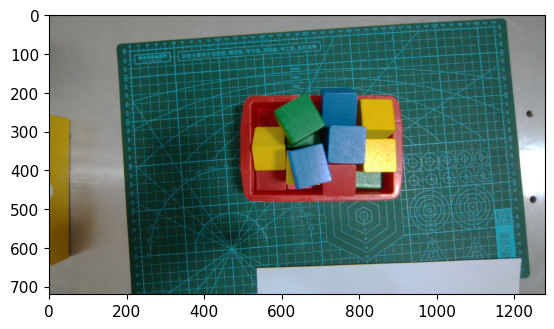

In [4]:
img = camera.read_color_img()
plt.imshow(img[:, :, ::-1])

## 模型预测


0: 640x1088 9 color_blocks, 32.3ms
Speed: 5.9ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1088, 1088)


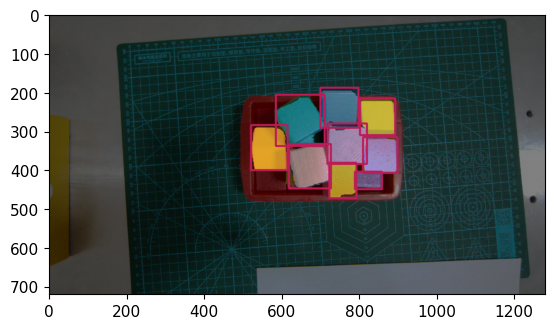

In [5]:
result = model.segment(img, draw_mask=True, draw_box=True, draw_label=False)
canvas, class_id_list, obj_mask_list, xyxy_list, conf_list = result 
plt.imshow(canvas[:, :, ::-1])

物体类别ID列表: [0, 0, 0, 0, 0, 0, 0, 0, 0]
ROI区域: [700, 189, 798, 292]
置信度: 0.925


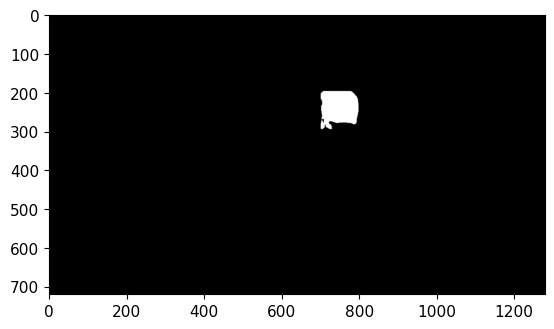

In [6]:
obj_idx = 0
print(f"物体类别ID列表: {class_id_list}")
print(f"ROI区域: {xyxy_list[obj_idx]}")
print(f"置信度: {conf_list[obj_idx]:.3f}")
# 显示物体的Mask
mask = obj_mask_list[obj_idx]
plt.imshow(mask, cmap="gray")